# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
complete_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice.
TotalMice=len(complete_data["Mouse ID"].unique())
TotalMice

249

In [41]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseid_duplicates = complete_data.loc[complete_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouseid_duplicates


array(['g989'], dtype=object)

In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df=mouse_metadata["Mouse ID"].drop_duplicates()
clean_df=complete_data[complete_data["Mouse ID"]!= "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice in the clean DataFrame.
mice_clean=clean_df["Mouse ID"].nunique()
mice_clean

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = complete_data.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean_Tumorvolume= drug_regimen["Tumor Volume (mm3)"].mean()
median_Tumorvolume= drug_regimen["Tumor Volume (mm3)"].median()
sd_Tumorvolume= drug_regimen["Tumor Volume (mm3)"].std()
variance_Tumorvolume=drug_regimen["Tumor Volume (mm3)"].var()
SEM_Tumorvolume= drug_regimen["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary_statistics= pd.DataFrame({"Mean Tumor Volume":mean_Tumorvolume,
                                     "Median Tumor Volume":median_Tumorvolume,
                                     "SD Tumor Volume":sd_Tumorvolume,
                                     "Variance Tumor Volume":variance_Tumorvolume,
                                     "SEM Tumor Volume":SEM_Tumorvolume})
Summary_statistics



,Mean Tumor Volume,Median Tumor Volume,SD Tumor Volume,Variance Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
# Using the aggregation method, produce the same summary statistics in a single line
complete_data.groupby("Drug Regimen").agg(aggregations)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

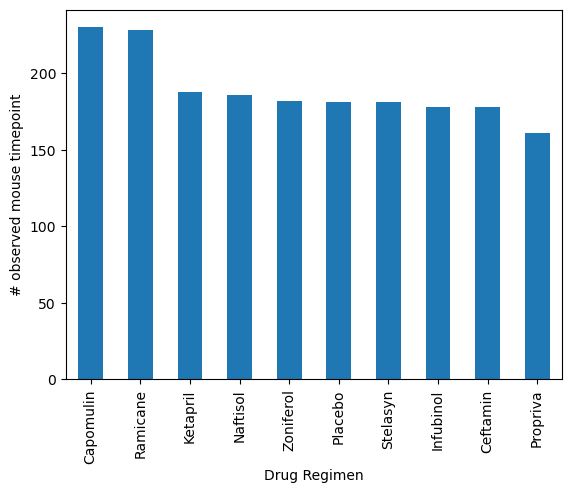

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

plt.xlabel("Drug Regimen")
plt.ylabel("# observed mouse timepoint")
bar_plot = complete_data["Drug Regimen"].value_counts().plot.bar(y="# observed mouse timepoint")





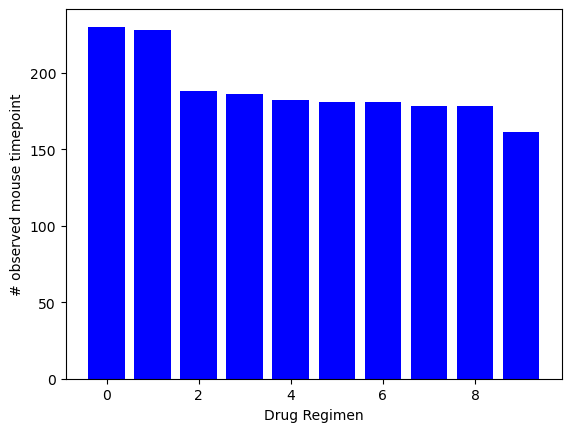

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot= complete_data['Drug Regimen'].value_counts()
x_axis = np.arange(len(pyplot))
plt.bar(x_axis, pyplot, color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# observed mouse timepoint")
plt.show()




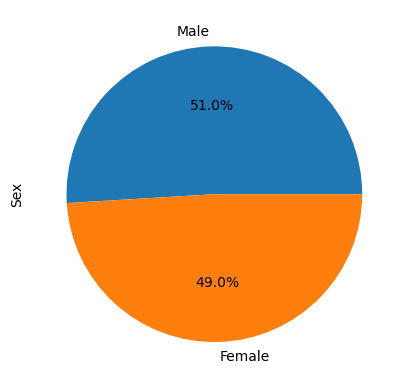

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = clean_df["Sex"].value_counts()
male_female.plot.pie(autopct= "%1.1f%%")
plt.show()

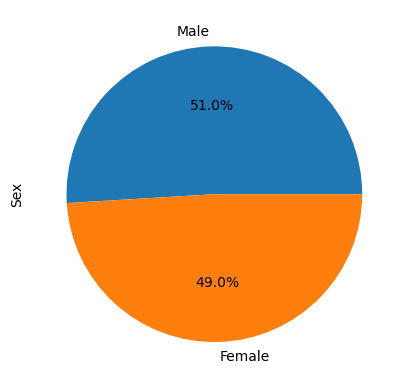

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plot = male_female.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = complete_data.groupby(["Mouse ID"]).max()
mouse_reset = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_frame = mouse_reset[['Mouse ID','Timepoint']].\
                    merge(complete_data,on=['Mouse ID','Timepoint'],how="left")

In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capomulin=[]
tumor_ramicane=[]
tumor_infubinol=[]
tumor_ceftamin=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def get_outliers(regimen):
    regimen_data = merged_data_frame.loc[merged_data_frame["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(29.00000000000002, 0.5, 'Final Tumor volume(mm3)')

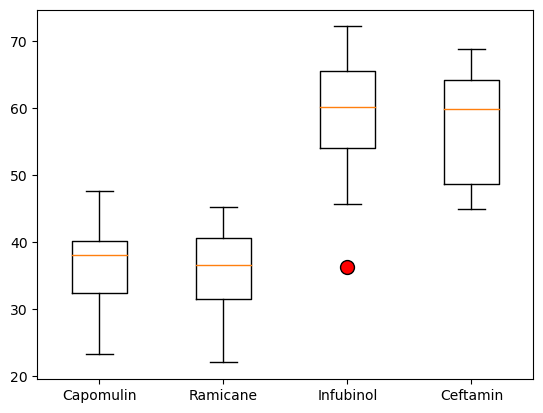

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft],labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops= red_dot)
ax1.set_ylabel("Final Tumor volume(mm3)")


## Line and Scatter Plots

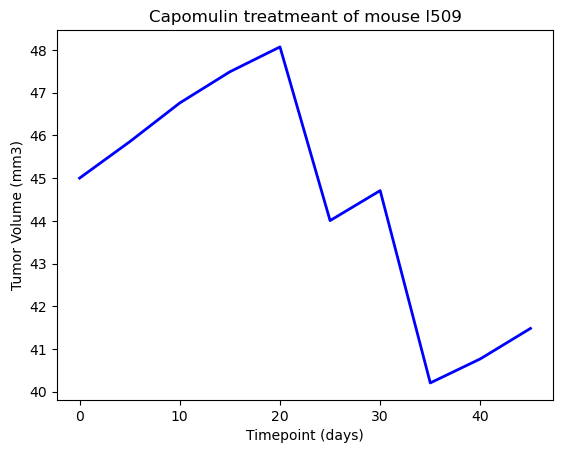

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df=clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Line_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
Line_plot.head()
x_axis = Line_plot["Timepoint"]
size = Line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatmeant of mouse l509")
plt.plot(x_axis,size,linewidth=2,color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


C:\Users\induj\AppData\Local\Temp\ipykernel_20956\1570763149.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_tumorvolume =Capomulin_df.groupby(["Mouse ID"]).mean()


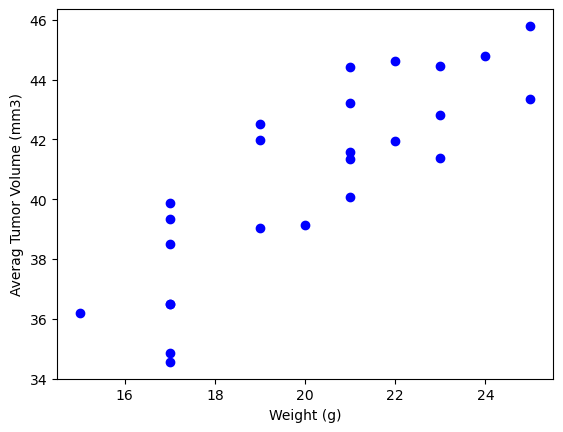

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#fig1, ax1 = plt.subplots()
avg_tumorvolume =Capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(avg_tumorvolume["Weight (g)"],avg_tumorvolume["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

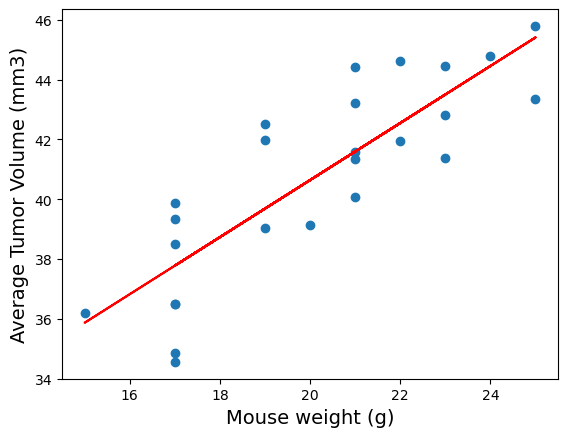

In [56]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = avg_tumorvolume["Weight (g)"]
y_values = avg_tumorvolume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Mouse weight (g)", fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.show()